In [13]:
from prophet.utilities import regressor_coefficients

In [1]:
import pandas as pd
import numpy as np
import nasdaqdatalink
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
oil = pd.read_csv("C:/Users/Admin/Desktop/Data Capstone/Oil_Price.csv")
oil

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86
...,...,...
4961,2022-03-25,115.99
4962,2022-03-28,113.39
4963,2022-03-29,110.05
4964,2022-03-30,110.46


In [3]:
oil['Date'] = pd.to_datetime(oil['Date'])

In [4]:
oil.columns=['ds','y']

In [25]:
m = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.1)

In [26]:
m.fit(oil)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5326,2023-03-27
5327,2023-03-28
5328,2023-03-29
5329,2023-03-30
5330,2023-03-31


In [28]:
forecast = m.predict(future)

In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-02,27.808550,16.083261,32.961015,27.808550,27.808550,-3.296564,-3.296564,-3.296564,-3.296564,-3.296564,-3.296564,0.0,0.0,0.0,24.511986
1,2003-01-03,27.807521,15.705802,33.307444,27.807521,27.807521,-3.224796,-3.224796,-3.224796,-3.224796,-3.224796,-3.224796,0.0,0.0,0.0,24.582725
2,2003-01-06,27.804436,15.965778,33.734775,27.804436,27.804436,-3.020127,-3.020127,-3.020127,-3.020127,-3.020127,-3.020127,0.0,0.0,0.0,24.784310
3,2003-01-07,27.803408,16.017483,33.531314,27.803408,27.803408,-2.958118,-2.958118,-2.958118,-2.958118,-2.958118,-2.958118,0.0,0.0,0.0,24.845290
4,2003-01-08,27.802380,16.467432,34.098167,27.802380,27.802380,-2.900442,-2.900442,-2.900442,-2.900442,-2.900442,-2.900442,0.0,0.0,0.0,24.901938


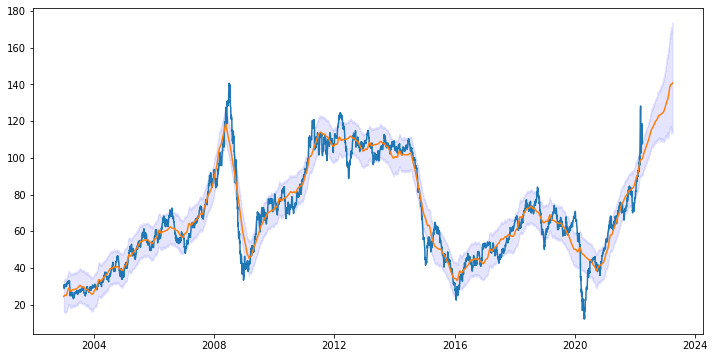

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

x = oil['ds']
y = oil['y']

x_pred = forecast['ds']
yhat = forecast['yhat']

yhat_upper = forecast['yhat_upper']
yhat_lower = forecast['yhat_lower']

ax.plot(x,y)
ax.plot(x_pred,yhat)
ax.fill_between(x_pred, yhat_lower, yhat_upper, color='b', alpha=.1)

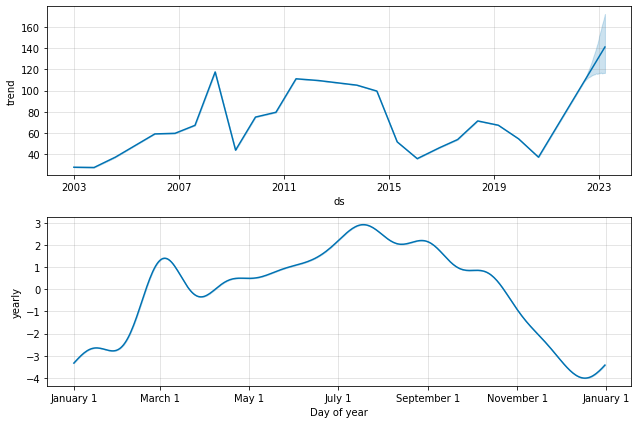

In [31]:
fig2 = m.plot_components(forecast)

In [18]:
regressor_coef = regressor_coefficients(m)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

AssertionError: No extra regressors found.

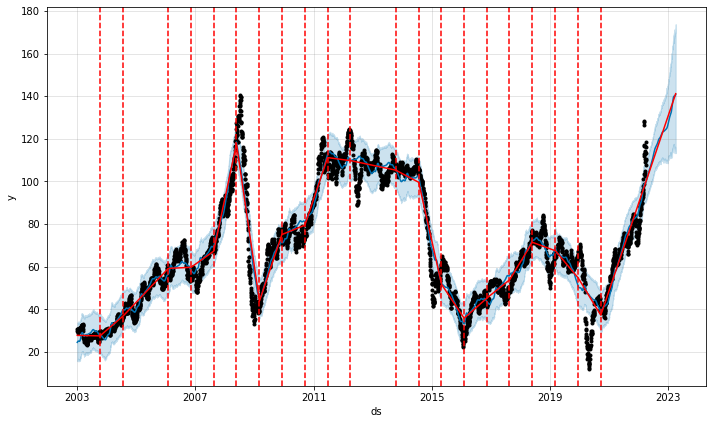

In [32]:
from prophet.plot import add_changepoints_to_plot
fig1 = m.plot(forecast)# viewing the points in time where the trajectory of the price index changed
a = add_changepoints_to_plot(fig1.gca(), m, forecast)